<a href="https://colab.research.google.com/github/data2450/deep-learning-intro/blob/main/deep_learning_hyper_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
url='https://raw.githubusercontent.com/krishnaik06/Keras-Tuner/main/Real_Combine.csv'

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=c83b3e61589e1be821ba91f59e891e6a25d41d94055a2568c8ccab2e1d66cd04
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=9fb25369ed290469144ec638ec25055dcc0b9cc8ff635784326777f1655f1c89
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

In [4]:
df=pd.read_csv(url)
print(df.isnull().values.any())
print(df.shape)
df.head()
#we have some null values

True
(1093, 9)


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN
#lets just drop that 

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
184,14.3,19.2,10.9,1020.5,91.0,1.6,4.8,11.1,NaN


In [16]:
data=df.dropna()
print(data.shape)

(1092, 9)


In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

# Hyperparameters

How many number of hidden layers we should have?

How many number of neurons we should have in hidden layers?

Learning Rate



In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

In [ ]:
tuner.search_space_summary()



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

24/24 [==============================] - 0s 13ms/step - loss: nan - mean_absolute_error: nan - val_loss: 72.5572 - val_mean_absolute_error: 72.5572
Epoch 2/5
24/24 [==============================] - 0s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: 63.6293 - val_mean_absolute_error: 63.6293
Epoch 3/5
24/24 [==============================] - 0s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: 64.1682 - val_mean_absolute_error: 64.1682
Epoch 4/5
24/24 [===================

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

24/24 [==============================] - 0s 14ms/step - loss: nan - mean_absolute_error: nan - val_loss: 65.7539 - val_mean_absolute_error: 65.7539
Epoch 2/5
24/24 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: 63.9756 - val_mean_absolute_error: 63.9756
Epoch 3/5
24/24 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: 64.2991 - val_mean_absolute_error: 64.2991
Epoch 4/5
24/24 [===================

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

24/24 [==============================] - 0s 13ms/step - loss: nan - mean_absolute_error: nan - val_loss: 64.4304 - val_mean_absolute_error: 64.4304
Epoch 2/5
24/24 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: 67.0409 - val_mean_absolute_error: 67.0409
Epoch 3/5
24/24 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: 54.9670 - val_mean_absolute_error: 54.9670
Epoch 4/5
24/24 [===================

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

24/24 [==============================] - 0s 10ms/step - loss: nan - mean_absolute_error: nan - val_loss: 77.8096 - val_mean_absolute_error: 77.8096
Epoch 2/5
24/24 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: 62.8930 - val_mean_absolute_error: 62.8930
Epoch 3/5
24/24 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: 61.0466 - val_mean_absolute_error: 61.0466
Epoch 4/5
24/24 [===================

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

24/24 [==============================] - 0s 17ms/step - loss: nan - mean_absolute_error: nan - val_loss: 66.6209 - val_mean_absolute_error: 66.6209
Epoch 2/5
24/24 [==============================] - 0s 11ms/step - loss: nan - mean_absolute_error: nan - val_loss: 63.5133 - val_mean_absolute_error: 63.5133
Epoch 3/5
24/24 [==============================] - 0s 11ms/step - loss: nan - mean_absolute_error: nan - val_loss: 63.8099 - val_mean_absolute_error: 63.8099
Epoch 4/5
24/24 [=================

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

# lets test with this dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
y.shape

(1093,)

# feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# ANN

In [17]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

|-learning_rate: 0.01
|-num_layers: 6
|-units_0: 224
|-units_1: 128
|-units_2: 256
|-units_3: 64
|-units_4: 320
|-units_5: 480

In [ ]:
#model = keras.Sequential()
#model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(10,)))
#model.add(layers.Activation('softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=opt)

In [20]:
X.shape

(1092, 8)

In [21]:
classifier=keras.Sequential()

In [22]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 224, kernel_initializer = 'uniform' ,activation='relu',input_shape=(8,)))


In [23]:
# Adding the second hidden layer
classifier.add(Dense(units= 128, kernel_initializer  = 'he_uniform',activation='relu'))

classifier.add(Dense(units= 256, kernel_initializer  = 'he_uniform',activation='relu'))

classifier.add(Dense(units= 64, kernel_initializer  = 'he_uniform',activation='relu'))

classifier.add(Dense(units= 320, kernel_initializer  = 'he_uniform',activation='relu'))

classifier.add(Dense(units= 480, kernel_initializer  = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer  = 'glorot_uniform', activation = 'linear'))
#since thses is a regresin prb we are using using sigmoid in the output layer


In [24]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [26]:
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error',metrics=['mae','mse','mape'])


In [ ]:
#classifier.compile(loss='mean_absolute_error', optimizer=opt,metrics=['mean_absolute_error'])

In [27]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
52/52 [==============================] - 0s 8ms/step - loss: 69.0545 - mae: 69.0545 - mse: 8665.8340 - mape: 1893981184.0000 - val_loss: 63.8232 - val_mae: 63.8232 - val_mse: 6501.1665 - val_mape: 3605581312.0000
Epoch 2/100
52/52 [==============================] - 0s 5ms/step - loss: 65.7857 - mae: 65.7857 - mse: 7955.3862 - mape: 1977393024.0000 - val_loss: 71.3635 - val_mae: 71.3635 - val_mse: 6669.7915 - val_mape: 5264255488.0000
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 59.8805 - mae: 59.8805 - mse: 6103.6758 - mape: 1739503616.0000 - val_loss: 60.2026 - val_mae: 60.2026 - val_mse: 5278.6562 - val_mape: 4413612032.0000
Epoch 4/100
52/52 [==============================] - 0s 5ms/step - loss: 59.9722 - mae: 59.9722 - mse: 6263.0337 - mape: 1605102336.0000 - val_loss: 65.8991 - val_mae: 65.8991 - val_mse: 8092.3496 - val_mape: 2439035648.0000
Epoch 5/100
52/52 [==============================] - 0s 5ms/step - loss: 55.6245 - mae: 55.6245 - ms

In [28]:
import matplotlib.pyplot as plt
from matplotlib import pyplot


In [32]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'mape', 'val_loss', 'val_mae', 'val_mse', 'val_mape'])


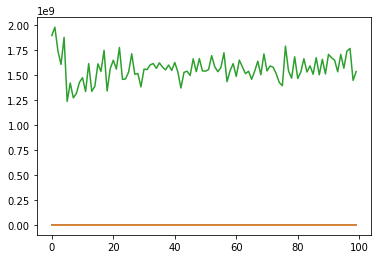

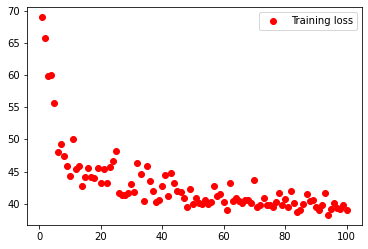

In [33]:
loss = model_history.history['loss']
acc = model_history.history['mae']
val_loss = model_history.history['val_loss']
val_acc = model_history.history['val_mae']
mape_loss=model_history.history['mape']
#cosine_los=history.history['cosine_proximity']
pyplot.plot(model_history.history['mse'])
pyplot.plot(model_history.history['mae'])
pyplot.plot(model_history.history['mape'])
#pyplot.plot(history.history['cosine_proximity'])
pyplot.show()
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'mape', 'val_loss', 'val_mae', 'val_mse', 'val_mape'])


In [ ]:
# Predicting the Test set results
prediction1 = classifier.predict(X_test)